In [27]:
import os

dir = r"data"

(884, 890, 3)


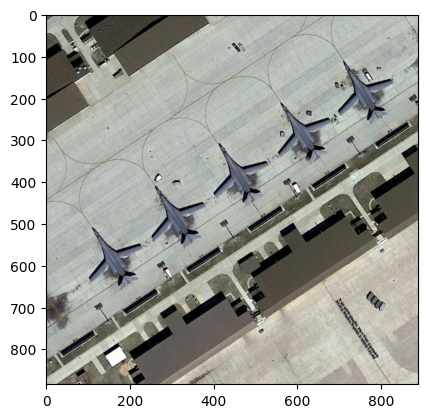

In [28]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r"data\JPEGImages\19.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [29]:
import os

images_train = []
images_test  = []

dir = r"data"

for i in os.listdir(dir):
    path = os.path.join(dir, i)
    if os.path.isdir(path) and i == "JPEGImages":
        # Get a sorted list of files in numerical order
        files = sorted(os.listdir(path), key=lambda x: int(os.path.splitext(x)[0]))
        for j in files:
            img_path = os.path.join(path, j)
            images_train.append(img_path)

# Split the images_train list into training and testing sets
start_index = int(len(images_train) * 0.8)
images_test.extend(images_train[start_index:])
images_train = images_train[:start_index]


In [30]:
print(f"first 80% for train   {images_train[-1:]}")
print(f"last 20% for train    {images_test[:1]}")

first 80% for train upto 3073  ['data\\JPEGImages\\159.jpg']
last 20% for train from 3074   ['data\\JPEGImages\\160.jpg']


In [31]:
import os
import shutil


train_dir = "train"
test_dir = "test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Save images to train directory
for idx, img_path in enumerate(images_train):
    new_path = os.path.join(train_dir, f"data_{idx}.jpg")
    shutil.copyfile(img_path, new_path)

# Save images to test directory
for idx, img_path in enumerate(images_test):
    new_path = os.path.join(test_dir, f"data_{idx}.jpg")
    shutil.copyfile(img_path, new_path)

In [32]:
import os


dir = r"data\Annotations"
Oriented_labels_train = []
Oriented_labels_test  = []

for i in os.listdir(dir):
    path = os.path.join(dir, i)
    if os.path.isdir(path) and i == "Oriented Bounding Boxes":

        files = sorted(os.listdir(path), key=lambda x: int(os.path.splitext(x)[0]))
        for j in files:
            xml_path = os.path.join(path, j)
            Oriented_labels_train.append(xml_path)

start_index = int(len(Oriented_labels_train) * 0.8)

Oriented_labels_test = Oriented_labels_train[start_index:]
Oriented_labels_train = Oriented_labels_train[:start_index]


In [33]:
print(f"first 80% for train   {Oriented_labels_train[-1:]}")
print(f"last 20% for train    {Oriented_labels_test[:1]}")

first 80% for train upto 3073  ['data\\Annotations\\Oriented Bounding Boxes\\159.xml']
last 20% for train from 3074   ['data\\Annotations\\Oriented Bounding Boxes\\160.xml']


In [34]:
import os
import shutil
import xml.etree.ElementTree as ET

train_dir = "train"
test_dir = "test"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def parse_xml_to_yolo(xml_path, class_mapping):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    image_width = int(root.find('size/width').text)
    image_height = int(root.find('size/height').text)
    
    yolo_annotations = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        class_label = class_mapping[class_name]
        
        robndbox = obj.find('robndbox')
        x_left_top = float(robndbox.find('x_left_top').text)
        y_left_top = float(robndbox.find('y_left_top').text)
        x_right_top = float(robndbox.find('x_right_top').text)
        y_right_top = float(robndbox.find('y_right_top').text)
        x_right_bottom = float(robndbox.find('x_right_bottom').text)
        y_right_bottom = float(robndbox.find('y_right_bottom').text)
        x_left_bottom = float(robndbox.find('x_left_bottom').text)
        y_left_bottom = float(robndbox.find('y_left_bottom').text)
        
        if image_width == 0 or image_height == 0:
            print(f"Warning: Image dimensions are zero in file: {xml_path}")
            continue
        
        x_center = (x_left_top + x_right_top + x_right_bottom + x_left_bottom) / 4 / image_width
        y_center = (y_left_top + y_right_top + y_right_bottom + y_left_bottom) / 4 / image_height
        width = max(x_right_top - x_left_top, x_right_bottom - x_left_bottom) / image_width
        height = max(y_right_bottom - y_right_top, y_left_bottom - y_left_top) / image_height
        
        yolo_annotations.append(f"{class_label} {x_center} {y_center} {width} {height}")
    
    return yolo_annotations, image_width, image_height



# Define the class mapping for classes A1 to A20
class_mapping = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "A4": 4,
    "A6": 5,
    "A7": 6,
    "A10": 7,
    "A11": 8,
    "A12": 9,
    "A13": 10,
    "A15": 11,
    "A18": 12,
    "A19": 13,
    "A20": 14

}

# Save images to train directory
for idx, xml_path in enumerate(Oriented_labels_train):
    yolo_annotations, _, _ = parse_xml_to_yolo(xml_path, class_mapping)
    txt_path = os.path.join(train_dir, f"data_{idx}.txt")
    with open(txt_path, 'w') as f:
        f.write("\n".join(yolo_annotations))

# Save images to test directory
for idx, xml_path in enumerate(Oriented_labels_test):
    yolo_annotations, _, _ = parse_xml_to_yolo(xml_path, class_mapping)
    txt_path = os.path.join(test_dir, f"data_{idx}.txt")
    with open(txt_path, 'w') as f:
        f.write("\n".join(yolo_annotations))


In [187]:
! pip install ultralytics

# Training

In [35]:
! yolo task=detect mode=train model=yolov8s.pt data="C:/Users/BASIL K AJI/Desktop/Projects/Detectron/dataset_cfg.yaml" batch=8 epochs=10 project=Outputs name=training_results verbose=True

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.1+cpu CPU (Intel Core(TM) i3-1005G1 1.20GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:/Users/BASIL K AJI/Desktop/Projects/Detectron/dataset_cfg.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Outputs, name=training_results2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe


train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train...:   0%|          | 0/159 [00:00<?, ?it/s]
train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train... 10 images, 0 backgrounds, 0 corrupt:   6%|▋         | 10/159 [00:00<00:01, 98.04it/s]
train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train... 27 images, 0 backgrounds, 0 corrupt:  17%|█▋        | 27/159 [00:00<00:00, 139.85it/s]
train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train... 42 images, 0 backgrounds, 0 corrupt:  26%|██▋       | 42/159 [00:00<00:00, 136.92it/s]
train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train... 56 images, 0 backgrounds, 0 corrupt:  35%|███▌      | 56/159 [00:00<00:00, 137.81it/s]
train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train... 70 images, 0 backgrounds, 0 corrupt:  44%|████▍     | 70/159 [00:00<00:00, 123.61it/s]
train: Scanning C:\Users\BASIL K AJI\Desktop\Projects\Detectron\train... 83 images, 0 

# Test on Image

In [47]:
! yolo task=detect mode=predict model="Outputs\training_results2\weights\best.pt"  conf =0.20 source=test

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.1+cpu CPU (Intel Core(TM) i3-1005G1 1.20GHz)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

image 1/40 c:\Users\BASIL K AJI\Desktop\Projects\Detectron\test\data_0.jpg: 640x640 1 Dassault Mirage 2000, 586.4ms
image 2/40 c:\Users\BASIL K AJI\Desktop\Projects\Detectron\test\data_1.jpg: 640x640 1 Saab JAS 39 Gripen, 2 Mikoyan MiG-29 Fulcrums, 3 Dassault Mirage 2000s, 513.5ms
image 3/40 c:\Users\BASIL K AJI\Desktop\Projects\Detectron\test\data_10.jpg: 640x640 11 Dassault Mirage 2000s, 449.8ms
image 4/40 c:\Users\BASIL K AJI\Desktop\Projects\Detectron\test\data_11.jpg: 640x640 7 Dassault Mirage 2000s, 523.5ms
image 5/40 c:\Users\BASIL K AJI\Desktop\Projects\Detectron\test\data_12.jpg: 640x640 1 Mitsubishi F-2, 11 Dassault Mirage 2000s, 457.7ms
image 6/40 c:\Users\BASIL K AJI\Desktop\Projects\Detectron\test\data_13.jpg: 640x640 3 Saab JAS 39 Gripens, 3 Dassault Mirage 2000s, 534.2ms
image 7/40 c:\Users\BASIL 

# Test on Video

In [39]:
! yolo task=detect mode=predict model="Outputs\training_results2\weights\best.pt"  conf =0.20 source="Video_test\x2mate.com-Battlefield 2042 Trailer - F-35 fighter jet scene-(720p60).mp4"

Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.1+cpu CPU (Intel Core(TM) i3-1005G1 1.20GHz)
Model summary (fused): 168 layers, 11131389 parameters, 0 gradients, 28.5 GFLOPs

video 1/1 (frame 1/1862) c:\Users\BASIL K AJI\Desktop\Projects\Detectron\Video_test\x2mate.com-Battlefield 2042 Trailer - F-35 fighter jet scene-(720p60).mp4: 384x640 (no detections), 469.8ms
video 1/1 (frame 2/1862) c:\Users\BASIL K AJI\Desktop\Projects\Detectron\Video_test\x2mate.com-Battlefield 2042 Trailer - F-35 fighter jet scene-(720p60).mp4: 384x640 (no detections), 392.5ms
video 1/1 (frame 3/1862) c:\Users\BASIL K AJI\Desktop\Projects\Detectron\Video_test\x2mate.com-Battlefield 2042 Trailer - F-35 fighter jet scene-(720p60).mp4: 384x640 (no detections), 365.0ms
video 1/1 (frame 4/1862) c:\Users\BASIL K AJI\Desktop\Projects\Detectron\Video_test\x2mate.com-Battlefield 2042 Trailer - F-35 fighter jet scene-(720p60).mp4: 384x640 1 Dassault Mirage 2000, 438.5ms
video 1/1 (frame 5/1862) c:\Users\BASIL K AJI\De